# Q&A on Bayesian Statistics

## Scenarios in which Bayesian Statistics may be able to provide benefit over traditional methods:
1. **Bayesian structural time series modeling:**
    -  This class of models has a seasonal component, a trend component and external regressors.
    - [Inferring causal impact using Bayesian structural time-series models](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/41854.pdf)
    - [youtube video on causal impact](https://www.youtube.com/watch?v=GTgZfCltMm8)
    - [Timeseers: modelling hierarchical timeseries in PYMC3](https://github.com/MBrouns/timeseers) and [Youtube video](https://www.youtube.com/watch?v=jo12CWZ00Lo&t=1521s)
2. **Bayesian time-to-event prediction / reliability analysis / failure prediction**: 
    - Predictive maintenance
    - 
3. **Risk analysis**
    - Risk prediction in the financial sector
    - 
4. **Hierarchical modelling**
    - each scenario where data is split in multiple classes and some or all of these categories have only few data

## Basic theory

**generative models**: generative models are capable of simulating predictions. Bayesian models are always generative.

**likelihood function**: the function that describes the distribution of data in your model. It is the one that links your model to the outcome variable.

**link function**: A function that transforms a parameter of your model to some bounded space. Eg. when choosing a Binomial likelihood function, you need to model parameter $p$, the probability of an event happening. A probability needs to lie between 0 and 1. Attaching a linear model to $p$ is common and it then requires to be transformed via a logit link function. The two most common link functions are:

- logit link: transforms a scale to another scale which is defined between 0 and 1
- log link: transforms a parameter that is defined on positive real values to a linear model

**conjugate priors**: given a particular likelihood function, a conjugate prior is one that allows to compute an analytical solution for parameters. 
For the case of a bernoulli, binomial, negative binomial and geometric likelihood function the beta distribution is the conjugate prior. 

**Intervals**
- **Credible** or **compatibility interval**: An interval of posterior probability, which may take the form of a Percentile Interval or of an HPDI.
- **HPDI**:  The **H**ighest **P**osterior **D**ensity **I**nterval is the narrowest interval that covers the specified probability mass on the posterior distribution. As such it is a subtype of the compatibility interval.
- **HDI**: **H**ighest **D**ensity **I**nterval. See HPDI. [arviz terminology](https://arviz-devs.github.io/arviz/api/generated/arviz.hdi.html?highlight=hdi#arviz.hdi): "Minimum width Bayesian Credible Interval"


**rhat**

**sort these terms:**
- **odds**: Probability of an event divided by the probability of the event not occurring $p / (1-p)$
- **logit** or **log-odds**: A nonlinear probability function: $logit(p) = log(p / (1-p))$. It's the logarithm of the odds of the occurence of an event
- **logistic transformation** or **inverse-logit**: a transformation where a linear scale is transformed to  probabilities between 0 and 1: $y = e^x / (1 + e^x)$ Its the inverse of logits. See [APA](https://dictionary.apa.org/logistic-transformation)
- **log-probability**: $log(p)$
- **likelihood**
- **log-likelihood**

## Evaluating model fit and predictive accuracy

**Information Entropy**: Given there are $I$  possible events each with probability $p_i$, then the uncertainty contained in the probability distribution is the average log-probability of the events:  
$H(p) = -E log(p_i) = - \sum\limits_i^n p_i log(p_i)$  
Example:   
Weather in Munich (Summer): $p_{rain}=0.3$ and $p_{sun}=0.7$, then $H(p) =0.61$  
Weather in Abu Dhabi: $p_{rain}=0.01$ and $p_{sun}=0.99$, then $H(p) =0.06$  
Weather in Munich (Winter): $p_{rain}=0.15$ and $p_{sun}=0.7$ and $p_{snow}=0.15$ then $H(p) =0.82$

So information entropy is a measure for the uncertainty of a probability distribution

**KL Divergence**: Is the additional uncertainty induced by using probabilities from one distribution to describe another distribution. KL stands for Kullback-Leibler after the people who introduced it. It is defined as 

$D_{KL}(p, q) = \sum\limits_i p_i(log(p_i) - log(q_i)) = \sum\limits_i p_i log(p_i / q_i)$  
where $p_i$ is the true probability of an event and $q_i$ is the probability that we assume is true. The KL Divergence is the difference between the entropy of the target distribution $p$ and the cross entropy arising from using $q$ to predict $p$. If $q = p$ then $D_{KL} = 0$. In other words, divergence measures how far our assumed distribution $q$ is from the true target $p$ in units of entropy.  
The difficulty is that $p$ is unknown, so we cannot calculate divergence directly. But we can contrast different approximations to $p$. And we do this by calculating the difference in entropies of models.

**Deviance**: We calculate the log-probability score of a model like so:

$S(q) = \sum\limits_i log(q_i)$  
which is an estimation of $E log(q_i)$. In a Bayesian context, we need to compute this on the full posterior, which leads to the **Log-pointwise-predictive-density**. The LPPD can be summed up to the log-probability score. Then we can compare models by the deviance:  

$S(q)-S(r)$. 

## Predicting predictive accuracy

**Cross Validation**

**Information Criteria**
- **WAIC**: the **W**idely **A**pplicable **I**nformation **C**riterion tries to predict the **out-of-sample-KL-divergence**. It is a more general information criterion than the AIC and the BIC. It is basically the log-probability (log-pointwise-predictive-density) of a model corrected by a penalty.

## Sampling

**Interpreting Model Output** What do the following columns mean?  

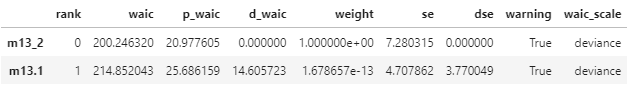

**Target Acceptance Rate**:

**What is the relation between MCMC and NUTS**: